In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
df = pd.read_csv('spam.csv')

In [5]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.shape

(5572, 2)

In [8]:
stop_words = set(stopwords.words('english'))
df['Message'] = df['Message'].apply(lambda x : ''.join(word.lower()
                              for word in word_tokenize(x) if word.isalpha()))
df['Message'] = df['Message'].apply(lambda x : ''.join(word for word  in x.split()
                                     if word not in stop_words))
                              

In [9]:
df['Message']

0       gountiljurongpointcrazyavailableonlyinbugisngr...
1                                      oklarjokingwifuoni
2       freeentryinawklycomptowinfacupfinaltktsmaytext...
3                       udunsaysoearlyhorucalreadythensay
4           nahidothinkhegoestousfhelivesaroundherethough
                              ...                        
5567    thisisthetimewehavetriedcontactuhavewonthepoun...
5568                         willübgoingtoesplanadefrhome
5569            pitywasinmoodforthatsoanyothersuggestions
5570    theguydidsomebitchingbutiactedlikeibeintereste...
5571                                 roflitstruetoitsname
Name: Message, Length: 5572, dtype: object

In [10]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Message'])

In [11]:
X

<5572x5062 sparse matrix of type '<class 'numpy.float64'>'
	with 5564 stored elements in Compressed Sparse Row format>

In [12]:
print(X)

  (0, 1120)	1.0
  (1, 3185)	1.0
  (2, 933)	1.0
  (3, 4157)	1.0
  (4, 2796)	1.0
  (5, 951)	1.0
  (6, 861)	1.0
  (7, 283)	1.0
  (8, 4628)	1.0
  (9, 1164)	1.0
  (10, 1891)	1.0
  (11, 3593)	1.0
  (12, 4237)	1.0
  (13, 1745)	1.0
  (14, 1916)	1.0
  (15, 4673)	1.0
  (16, 3066)	1.0
  (17, 831)	1.0
  (18, 896)	1.0
  (19, 840)	1.0
  (20, 2148)	1.0
  (21, 2022)	1.0
  (22, 3746)	1.0
  (23, 26)	1.0
  (24, 887)	1.0
  :	:
  (5547, 1163)	1.0
  (5548, 2889)	1.0
  (5549, 4926)	1.0
  (5550, 561)	1.0
  (5551, 4430)	1.0
  (5552, 1238)	1.0
  (5553, 1184)	1.0
  (5554, 4414)	1.0
  (5555, 4764)	1.0
  (5556, 4787)	1.0
  (5557, 2879)	1.0
  (5558, 3670)	1.0
  (5559, 1866)	1.0
  (5560, 204)	1.0
  (5561, 1018)	1.0
  (5562, 3196)	1.0
  (5563, 221)	1.0
  (5564, 4597)	1.0
  (5565, 1667)	1.0
  (5566, 3430)	1.0
  (5567, 4059)	1.0
  (5568, 4623)	1.0
  (5569, 3327)	1.0
  (5570, 3958)	1.0
  (5571, 3449)	1.0


In [13]:
X_train, X_test, y_train, y_test =train_test_split(X,df['Category'],test_size = 0.2)

In [14]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [15]:
y_pred = model.predict(X_test)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       964
        spam       1.00      0.01      0.03       151

    accuracy                           0.87      1115
   macro avg       0.93      0.51      0.48      1115
weighted avg       0.88      0.87      0.81      1115



In [17]:
Accuracy = accuracy_score(y_test,y_pred)

In [18]:
Accuracy

0.8663677130044843

C:\Users\agraw\AppData\Local\Temp\ipykernel_8088\588065212.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='viridis')


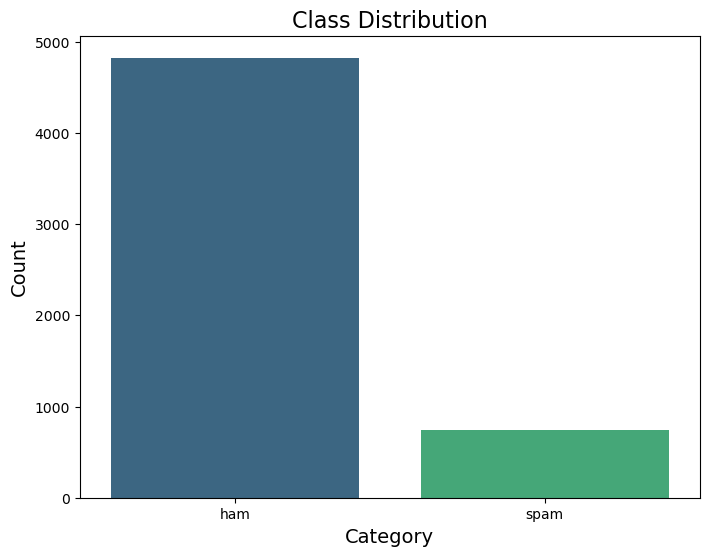

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=df, palette='viridis')
plt.title("Class Distribution", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

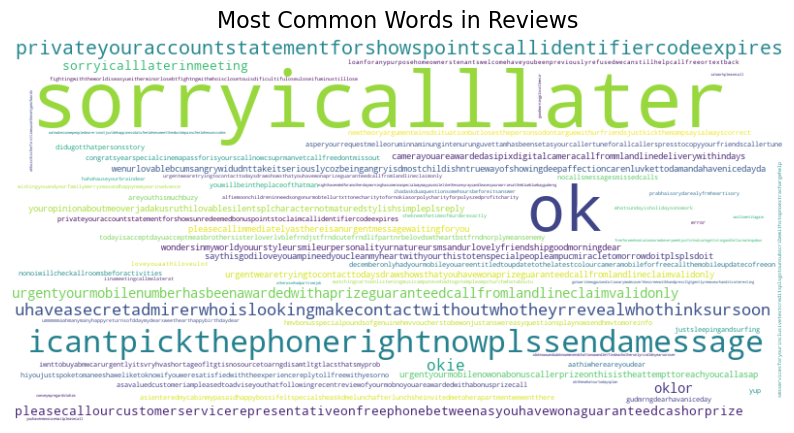

In [38]:
from wordcloud import WordCloud

# Combine all preprocessed reviews into one string
text = ' '.join(df['Message'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Reviews", fontsize=16)
plt.show()

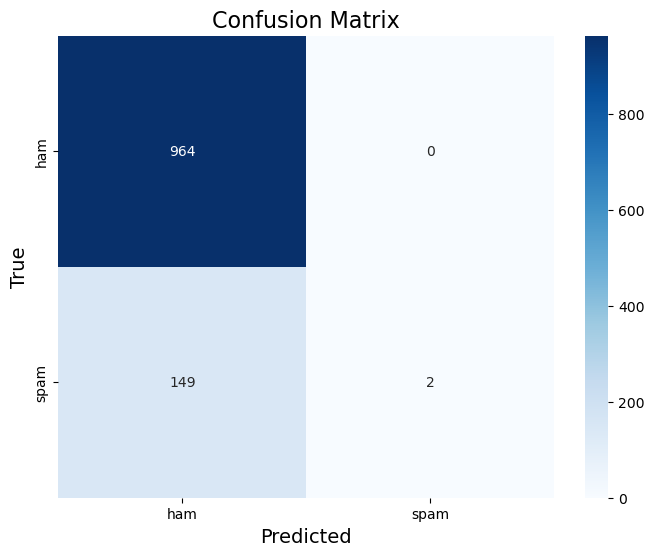

In [40]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
plt.show()


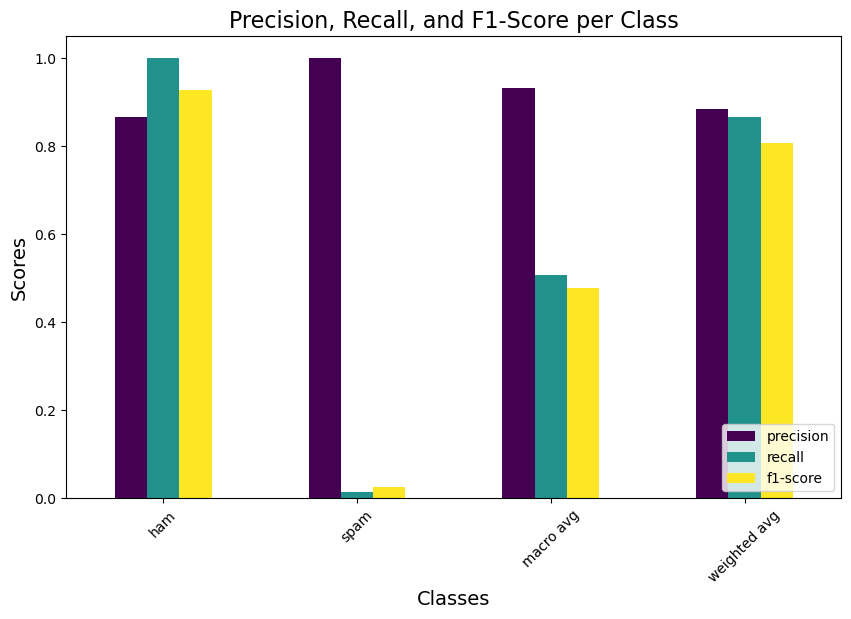

In [42]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report as a DataFrame
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose().drop(['accuracy'])

# Plot precision, recall, and F1-score
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Precision, Recall, and F1-Score per Class", fontsize=16)
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Scores", fontsize=14)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()


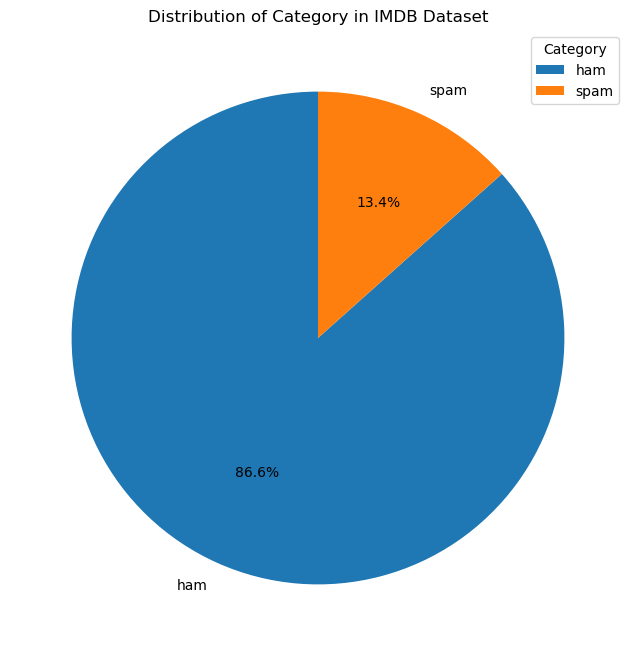

In [44]:
genre_counts = df['Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90)

# Add legend
plt.legend(genre_counts.index, title="Category", loc="best")

# Add title
plt.title('Distribution of Category in IMDB Dataset')

# Show the chart
plt.show()